<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="120" />

# Table of Content



1. [Problem Statement](#section1)<br>
2. [Dataset Description](#section2)<br>
3. [Examine the Data](#section3)<br>
4. [Description of what challenges are present in the Data](#section4)<br>
5. [Resolve the challenges](#section5)<br>
6. [EDA and Inferences](#section6)<br>
7. [Feature Engineering](#section7)<br>
8. [Build models](#section8)<br>
9. [Evaluate models and finalize the mode](#section9)<br>



<a id=section1></a>
# 1. Problem Statement

## Your client for this project is the HR Department at a software company.

They want to try a new initiative to retain employees.
The idea is to use data to predict whether an employee is likely to leave.
Once these employees are identified, HR can be more proactive in reaching out to them before it's too late.
They only want to deal with the data that is related to permanent employees.

## Current Practice
Once an employee leaves, he or she is taken an interview with the name “exit interview” and shares reasons for leaving. The HR Department then tries and learns insights from the interview and makes changes accordingly.

##This suffers from the following problems:

This approach is that it's too haphazard. The quality of insight gained from an interview depends heavily on the skill of the interviewer.
The second problem is these insights can't be aggregated and interlaced across all employees who have left.
The third is that it is too late by the time the proposed policy changes take effect.

###The HR department has hired you as data science consultants. They want to supplement their exit interviews with a more proactive approach

<a id=section2></a>
#2. Dataset Description

The Business Intelligence Analysts of the Company provided you three datasets that contain information about past employees and their status (still employed or already left).

## department_data
This dataset contains information about each department. The schema of the dataset is as follows:

### dept_id – Unique Department Code
### dept_name – Name of the Department
### dept_head – Name of the Head of the Department

#employee_details_data
This dataset consists of Employee ID, their Age, Gender and Marital Status. The schema of this dataset is as follows:

### employee_id – Unique ID Number for each employee
### age – Age of the employee
### gender – Gender of the employee
### marital_status – Marital Status of the employee

## employee_data
This dataset consists of each employee’s Administrative Information, Workload Information, Mutual Evaluation Information and Status.

## Target variable

### status – Current employment status (Employed / Left)
Administrative information

### department – Department to which the employees belong(ed) to
### salary – Salary level with respect to rest of their department
### tenure – Number of years at the company
### recently_promoted – Was the employee promoted in the last 3 years?
### employee_id – Unique ID Number for each employee

## Workload information

### n_projects – Number of projects employee has worked on
### avg_monthly_hrs – Average number of hours worked per month

## Mutual evaluation information

### satisfaction – Score for employee’s satisfaction with the company (higher is better)
### last_evaluation – Score for most recent evaluation of employee (higher is better)
### filed_complaint – Has the employee filed a formal complaint in the last 3 years?


In [1]:
!pip install mysql-connector-python

     |████████████████████████████████| 37.5 MB 58 kB/s 


In [2]:
import mysql.connector 
import pandas as pd
import seaborn as sns

In [3]:
# To supress all the warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
myconnection1 = mysql.connector.connect(host='cpanel.insaid.co', database='Capstone2', user='student', password='student')
mycursor1 = myconnection1.cursor()

# 3. Loading the Data

In [5]:
mycursor1.execute('SELECT * FROM department_data')
dept_table = mycursor1.fetchall()
df_dept_data = pd.DataFrame(data = dept_table, columns=mycursor1.column_names)

In [6]:
df_dept_data.head(15)

,dept_id,dept_name,dept_head
0,D00-IT,IT,Henry Adey
1,D00-SS,Sales,Edward J Bayley
2,D00-TP,Temp,Micheal Zachrey
3,D00-ENG,Engineering,Sushant Raghunathan K
4,D00-SP,Support,Amelia Westray
5,D00-FN,Finance,Aanchal J
6,D00-PR,Procurement,Louie Viles
7,D00-AD,Admin,Evelyn Tolson
8,D00-MN,Management,Ellie Trafton
9,D00-MT,Marketing,Reuben Swann


In [7]:
df_dept_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   dept_id    11 non-null     object
 1   dept_name  11 non-null     object
 2   dept_head  11 non-null     object
dtypes: object(3)
memory usage: 392.0+ bytes


There are 11 different departments in the "department_data" table. No dulicates.

In [8]:
mycursor1.execute('SELECT * FROM employee_details_data')
emp_details_table = mycursor1.fetchall()
df_emp_details_data = pd.DataFrame(data= emp_details_table, columns=mycursor1.column_names)

In [9]:
df_emp_details_data.head(10)

,employee_id,age,gender,marital_status
0,113558,43,Male,Married
1,112256,24,Female,Unmarried
2,112586,22,Female,Unmarried
3,108071,36,Male,Married
4,116915,38,Male,Married
5,104555,22,Male,Unmarried
6,104706,51,Male,Married
7,118536,54,Male,Married
8,111712,43,Male,Married
9,119150,49,Male,Married


In [10]:
df_emp_details_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14245 entries, 0 to 14244
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   employee_id     14245 non-null  int64 
 1   age             14245 non-null  int64 
 2   gender          14245 non-null  object
 3   marital_status  14245 non-null  object
dtypes: int64(2), object(2)
memory usage: 445.3+ KB


In [11]:
df_emp_details_data.describe()

,employee_id,age
count,14245.000000,14245.000000
mean,112123.050544,32.889926
std,8500.457343,9.970834
min,100101.000000,22.000000
25%,105775.000000,24.000000
50%,111298.000000,29.000000
75%,116658.000000,41.000000
max,148988.000000,57.000000


In [12]:
df_emp_details_data.employee_id.nunique()

14245

### There are total of 14245 unique emploee IDs in employee_details_data table. The IDs are in the range of 100101 to 148988.

### From these employees, minimum age is 22 and max is 57. Which is acceptable range for employement. No null values in age column.

### gender & marital_status columns have valid values only.

In [13]:
mycursor1.execute('SELECT * from 	employee_data')
emp_data_table = mycursor1.fetchall()
df_emp_data = pd.DataFrame(data=emp_data_table, columns=mycursor1.column_names)

In [14]:
mycursor1.close()
myconnection1.close()

# 4. Examine the Data

In [15]:
df_emp_data.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
0,246.00,None,None,0.866838,6,NaN,medium,0.134415,Left,4.00,124467
1,134.00,None,None,0.555718,2,NaN,low,0.511041,Left,3.00,112210
2,156.00,D00-SS,1.00,0.474082,2,NaN,medium,0.405101,Left,3.00,126150
3,256.00,D00-SP,None,0.961360,6,NaN,low,0.152974,Left,4.00,125346
4,146.00,D00-SS,None,0.507349,2,NaN,medium,0.434845,Left,3.00,113707


In [16]:
df_emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14150 entries, 0 to 14149
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14150 non-null  object 
 1   department         13443 non-null  object 
 2   filed_complaint    2046 non-null   object 
 3   last_evaluation    12663 non-null  float64
 4   n_projects         14150 non-null  int64  
 5   recently_promoted  297 non-null    float64
 6   salary             14150 non-null  object 
 7   satisfaction       14000 non-null  float64
 8   status             14150 non-null  object 
 9   tenure             14000 non-null  object 
 10  employee_id        14150 non-null  int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 1.2+ MB


In [17]:
df_emp_data.describe()

,last_evaluation,n_projects,recently_promoted,satisfaction,employee_id
count,12663.000000,14150.000000,297.0,14000.000000,14150.000000
mean,0.718399,3.778304,1.0,0.621212,112080.750247
std,0.173108,1.250162,0.0,0.250482,8748.202856
min,0.316175,1.000000,1.0,0.040058,0.000000
25%,0.563711,3.000000,1.0,0.450356,105772.500000
50%,0.724731,4.000000,1.0,0.652394,111291.500000
75%,0.871409,5.000000,1.0,0.824925,116650.750000
max,1.000000,7.000000,1.0,1.000000,148988.000000


There are rows with 0 value in employee_id column, which is invalid so need to drop those rows.

In [18]:
df_emp_data.drop(df_emp_data[df_emp_data['employee_id']==0].index, inplace=True)

In [19]:
df_emp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14145 entries, 0 to 14149
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14145 non-null  object 
 1   department         13439 non-null  object 
 2   filed_complaint    2046 non-null   object 
 3   last_evaluation    12658 non-null  float64
 4   n_projects         14145 non-null  int64  
 5   recently_promoted  297 non-null    float64
 6   salary             14145 non-null  object 
 7   satisfaction       13995 non-null  float64
 8   status             14145 non-null  object 
 9   tenure             13995 non-null  object 
 10  employee_id        14145 non-null  int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 1.3+ MB


In [20]:
df_emp_data.employee_id.nunique()

14116

In [21]:
duplicate  = df_emp_data[df_emp_data.duplicated('employee_id')]
len(duplicate)

29

In [22]:
duplicate

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
14121,265.00,D00-MN,1.00,0.825672,3,NaN,low,0.545978,Employed,10.00,112373
14122,282.00,D00-SS,None,0.875427,6,NaN,low,0.065908,Left,4.00,116247
14123,206.00,D00-SS,None,1.000000,6,NaN,medium,0.783548,Left,5.00,112203
14124,161.00,D00-IT,None,0.715893,6,NaN,medium,0.867768,Left,4.00,108128
14125,163.00,D00-SP,None,0.486176,3,NaN,medium,0.832118,Employed,3.00,115446
14126,208.00,D00-FN,None,0.699756,4,NaN,low,0.476216,Employed,5.00,110546
14127,152.00,D00-MT,None,0.510016,3,NaN,low,0.826531,Employed,2.00,111968
14128,307.00,D00-IT,None,0.905708,7,NaN,low,0.125275,Left,4.00,111323
14129,212.00,D00-PD,None,0.773018,4,NaN,medium,0.829316,Employed,2.00,117454
14130,148.00,D00-MN,None,0.577112,3,NaN,high,0.481001,Employed,10.00,109425


#### Total 14245 unique employee details in df_emp_details_data dataframe.

#### Total 14150 entries  in df_emp_data dataframe.

#### There are 5 rows with employee_id = 0, which is invalid so deleted those rows. Then number of entries will be 14145.

 #### Out of them, There are 29 dulicate rows in df_emp_data when looked at employee_id column. This means we have only data for 14116 unique employees in df_emp_data dataframe.




In [23]:
df_emp_data.drop_duplicates(subset=['employee_id'], keep='first',inplace=True)

In [24]:
df_emp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14116 entries, 0 to 14120
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14116 non-null  object 
 1   department         13410 non-null  object 
 2   filed_complaint    2041 non-null   object 
 3   last_evaluation    12629 non-null  float64
 4   n_projects         14116 non-null  int64  
 5   recently_promoted  297 non-null    float64
 6   salary             14116 non-null  object 
 7   satisfaction       13966 non-null  float64
 8   status             14116 non-null  object 
 9   tenure             13966 non-null  object 
 10  employee_id        14116 non-null  int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 1.3+ MB


In [25]:
df_merged_emp = pd.merge(df_emp_details_data, df_emp_data, on='employee_id')

In [26]:
df_merged_emp.head()

,employee_id,age,gender,marital_status,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,113558,43,Male,Married,111.00,D00-PR,None,0.753977,5,1.0,medium,0.921208,Employed,4.00
1,112256,24,Female,Unmarried,201.00,D00-MN,None,0.964453,3,NaN,medium,0.568479,Employed,3.00
2,112586,22,Female,Unmarried,239.00,D00-SS,None,0.756458,3,NaN,low,0.144812,Employed,6.00
3,108071,36,Male,Married,151.00,D00-PR,None,0.608282,5,NaN,medium,0.210300,Employed,6.00
4,116915,38,Male,Married,259.00,-IT,None,0.749206,4,NaN,medium,0.888514,Employed,3.00


# 5. Challenges in Data & possible solutions

In [27]:
df_merged_emp['avg_monthly_hrs'] = df_merged_emp.avg_monthly_hrs.astype(float)

In [29]:
df_merged_emp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14116 entries, 0 to 14115
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   employee_id        14116 non-null  int64  
 1   age                14116 non-null  int64  
 2   gender             14116 non-null  object 
 3   marital_status     14116 non-null  object 
 4   avg_monthly_hrs    14116 non-null  float64
 5   department         13410 non-null  object 
 6   filed_complaint    2041 non-null   object 
 7   last_evaluation    12629 non-null  float64
 8   n_projects         14116 non-null  int64  
 9   recently_promoted  297 non-null    float64
 10  salary             14116 non-null  object 
 11  satisfaction       13966 non-null  float64
 12  status             14116 non-null  object 
 13  tenure             13966 non-null  object 
dtypes: float64(4), int64(3), object(7)
memory usage: 1.6+ MB


In [30]:
df_merged_emp.describe()

,employee_id,age,avg_monthly_hrs,last_evaluation,n_projects,recently_promoted,satisfaction
count,14116.000000,14116.000000,14116.000000,12629.000000,14116.000000,297.0,13966.000000
mean,112120.657764,32.896005,199.992632,0.718322,3.777770,1.0,0.621322
std,8497.639403,9.975000,50.826952,0.173069,1.249693,0.0,0.250460
min,100101.000000,22.000000,49.000000,0.316175,1.000000,1.0,0.040058
25%,105773.500000,24.000000,155.000000,0.563680,3.000000,1.0,0.450368
50%,111293.500000,29.000000,199.000000,0.724428,4.000000,1.0,0.652548
75%,116655.250000,41.000000,245.000000,0.871345,5.000000,1.0,0.824914
max,148988.000000,57.000000,310.000000,1.000000,7.000000,1.0,1.000000


In [31]:
df_merged_emp.gender.value_counts()

Male      9287
Female    4829
Name: gender, dtype: int64

In [32]:
df_merged_emp.marital_status.value_counts()

Unmarried    7211
Married      6905
Name: marital_status, dtype: int64

In [33]:
df_merged_emp.department.value_counts()

D00-SS     3895
D00-ENG    2573
D00-SP     2108
D00-IT     1152
D00-PD      853
D00-MT      812
D00-FN      722
D00-MN      590
-IT         207
D00-AD      175
D00-PR      173
D00-TP      150
Name: department, dtype: int64

In [34]:
df_dept_data.dept_id.unique()

array(['D00-IT', 'D00-SS', 'D00-TP', 'D00-ENG', 'D00-SP', 'D00-FN',
       'D00-PR', 'D00-AD', 'D00-MN', 'D00-MT', 'D00-PD'], dtype=object)

In [35]:
df_merged_emp['department'].replace({'-IT' : 'D00-IT'}, inplace=True)

In [36]:
df_merged_emp['department'].fillna('D00-SS', inplace=True)

In [37]:
df_merged_emp.department.value_counts()

D00-SS     4601
D00-ENG    2573
D00-SP     2108
D00-IT     1359
D00-PD      853
D00-MT      812
D00-FN      722
D00-MN      590
D00-AD      175
D00-PR      173
D00-TP      150
Name: department, dtype: int64

In [38]:
df_merged_emp.filed_complaint.value_counts()

1.00    2041
Name: filed_complaint, dtype: int64

In [39]:
# Assuming the missing values to be with Zero comlaints filed so filling it with 0
df_merged_emp['filed_complaint'].fillna(0, inplace=True)

In [40]:
df_merged_emp['last_evaluation'].fillna(df_merged_emp['last_evaluation'].median(),inplace=True)

In [41]:
df_merged_emp.n_projects.value_counts()

4    4044
3    3788
5    2566
2    2322
6    1093
7     242
1      61
Name: n_projects, dtype: int64

In [42]:
df_merged_emp.recently_promoted.value_counts()

1.0    297
Name: recently_promoted, dtype: int64

In [43]:
# Assuming the missing values to be with Zero for recently_promoted so filling it with 0
df_merged_emp['recently_promoted'].fillna(0, inplace=True)

In [44]:
df_merged_emp.salary.value_counts()

low       6889
medium    6086
high      1141
Name: salary, dtype: int64

In [45]:
len(df_merged_emp[df_merged_emp['salary'] == 'high'])/ len(df_merged_emp)

0.08083026353074525

In [46]:
len(df_merged_emp[df_merged_emp['satisfaction']< 0.4])/len(df_merged_emp)

0.19233493907622556

In [47]:
df_merged_emp['satisfaction'].fillna(df_merged_emp['satisfaction'].median(), inplace=True)

In [48]:
df_merged_emp.tenure.value_counts()

3.00     6006
2.00     3019
4.00     2386
5.00     1363
6.00      659
10.00     198
7.00      180
8.00      155
Name: tenure, dtype: int64

In [49]:
df_merged_emp['tenure'].fillna(3, inplace=True)

In [50]:
df_merged_emp.status.value_counts()

Employed    10761
Left         3355
Name: status, dtype: int64

employee_id:
1.   No Null values
2.   No 0 values
3.   Valid Data type

age:
1.   No Null values
2.   No 0 Values
3.   Valid Data type

gender:
1.   No Null values
2.   Valid entries
3.   Valid Data type

marital_status:
1.   No Null values
2.   Valid entries
3.   Valid Data type

avg_monthly_hrs:
1.   data type is object, it should be converted to float type.
2.   No Null values

department:
1.   706 Null entries
2.   Valid data type
3.   "-IT" to be replaced with "D00-IT" for 207 rows
4.  Missing values are nearly 5% so we cant drop those many rows. Either fill with Mode or KNN imputer

filed_complaint:
1.   2041 non-null values
2.   type = object
3.   Assuming that for employees who ever filed complaints were assigned value of  1 
4.   Possibly there are no complaints filed by other employees so can be filled with 0

last_evaluation: Score for most recent evaluation of employee (higher is better)
1.    12629  non-null  
2.    type = float64
3.    Missing values could be 0 or there is no evaluation done yet
4.    We filled it with median value

n_projects :
1.    14116 non-null entries
2.     type is  int64
3.    No null values
4.    Values ranges from 1 to 7, where there are more people with 3 or 4 projects

recently_promoted :
1.   297 non-null  entries
2.   type =  float64
3.   Assuming that employees who ever was recently promoted were assigned value = 1.00
4.   Missing values could be 0 as not recently promoted

salary :
1.  14116 non-null entries
2.  type =  object as this is a category variable
3.  No null values
4.  Nearly 8% of employees are with high salary from the merged dataframe.

satisfaction : Score for employee’s satisfaction with the company (higher is better)
1.   13966 non-null 
2.  type =  float64
3.  150 null values in this column
4.  Missing values could be "not satisfied"   or   "no information". Those missing values can be filled with "median" score as its around 1% .
5. On a 5 point scale, taking 40% as threshold there are 19.23% of employees not satisfied.
6.    We filled it with median value

tenure :  Number of years at the company
1.  13966 non-null entries
2. type = object
3.  150 null values in this column
4.  Missing values could be "not satisfied"   or   "no information". Those missing values can be filled with "median/mean" score as its around 1% .
5. Its an ordinal variable so can be converted to int or float

status :  Target variable
1. 2 categories  Employed , Left 
2. No null values





# EDA and Inferences

In [51]:
df_left = df_merged_emp[df_merged_emp['status']=='Left']

In [52]:
df_employed = df_merged_emp[df_merged_emp['status']=='Employed']

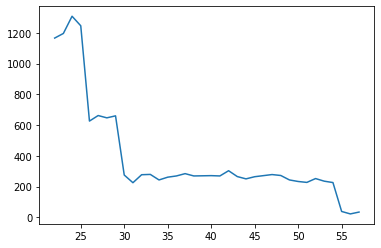

In [53]:
# Age distribution of all employees
df_merged_emp.age.value_counts().sort_index(ascending=True).plot(kind='line')

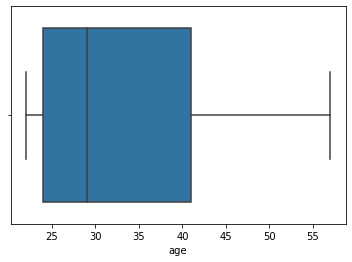

In [54]:
sns.boxplot(x='age', data= df_merged_emp)

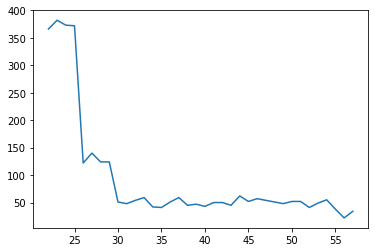

In [55]:
# Plotting the distribution of employees who "Left" on the axis of age.
df_merged_emp[df_merged_emp['status']=='Left'].age.value_counts().sort_index(ascending=True).plot(kind='line')

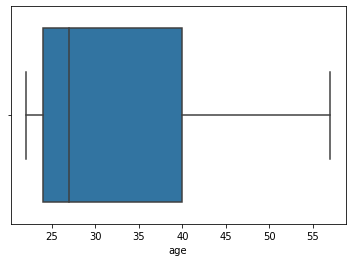

In [56]:
sns.boxplot(x='age', data = df_left)

In [57]:
# observed that 50% of employees left are less than age of 27

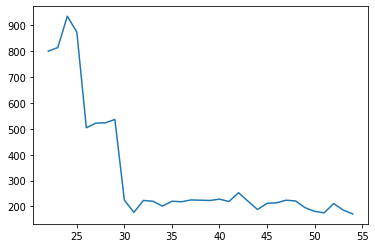

In [58]:
# Plotting the distribution of employees who "Employed" on the axis of age.
df_merged_emp[df_merged_emp['status']=='Employed'].age.value_counts().sort_index(ascending=True).plot(kind='line')

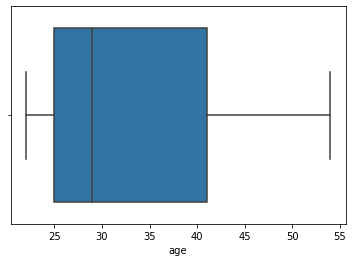

In [59]:
sns.boxplot(x='age', data = df_employed)

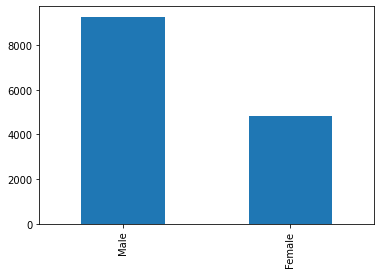

In [60]:
# Gender wise distribution
df_merged_emp.gender.value_counts().plot(kind='bar')

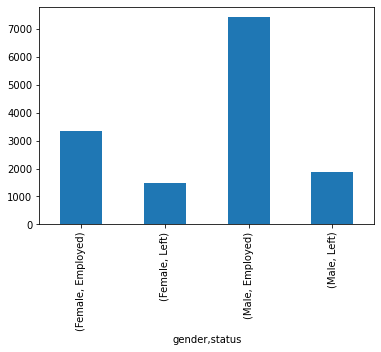

In [61]:
df_merged_emp.groupby('gender')['status'].value_counts().plot(kind='bar')

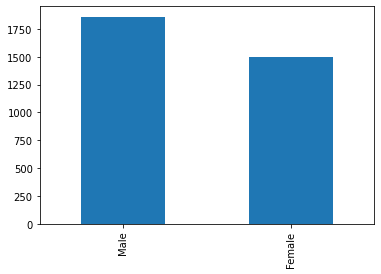

In [62]:
df_left['gender'].value_counts().plot(kind='bar')

In [63]:
print("Number of Female employee left : ", len(df_left[df_left['gender']=='Female']))
print("Total number of female emloyees : ", len(df_merged_emp[df_merged_emp['gender']=='Female']))
print("% of Female employee left: ", len(df_left[df_left['gender']=='Female']) / len(df_merged_emp[df_merged_emp['gender']=='Female']))
print("Number of Male employee left : ", len(df_left[df_left['gender']=='Male']))
print("Total number of male emloyees : ", len(df_merged_emp[df_merged_emp['gender']=='Male']))
print("% of Male employee left: ", len(df_left[df_left['gender']=='Male']) / len(df_merged_emp[df_merged_emp['gender']=='Male']))

Number of Female employee left :  1495
Total number of female emloyees :  4829
% of Female employee left:  0.3095879063988403
Number of Male employee left :  1860
Total number of male emloyees :  9287
% of Male employee left:  0.20027996123613653


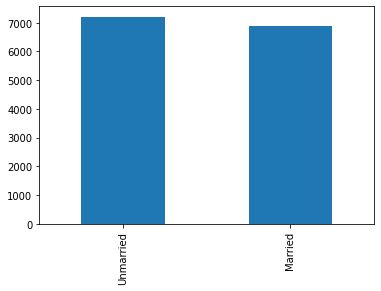

In [64]:
df_merged_emp.marital_status.value_counts().plot(kind='bar')

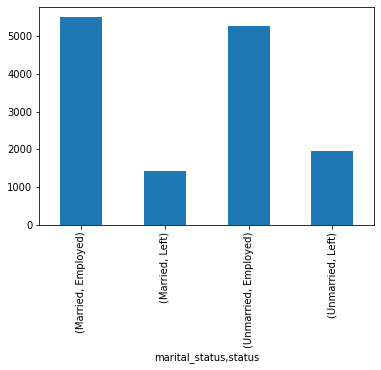

In [65]:
df_merged_emp.groupby('marital_status')['status'].value_counts().plot(kind='bar')

In [66]:
print("Number of Married employee left : ", len(df_left[df_left['marital_status']=='Married']))
print("Total number of Married emloyees : ", len(df_merged_emp[df_merged_emp['marital_status']=='Married']))
print("% of Married employee left: ", len(df_left[df_left['marital_status']=='Married']) / len(df_merged_emp[df_merged_emp['marital_status']=='Married']))
print("Number of Unmarried employee left : ", len(df_left[df_left['marital_status']=='Unmarried']))
print("Total number of Unmarried emloyees : ", len(df_merged_emp[df_merged_emp['marital_status']=='Unmarried']))
print("% of Unmarried employee left: ", len(df_left[df_left['marital_status']=='Unmarried']) / len(df_merged_emp[df_merged_emp['marital_status']=='Unmarried']))

Number of Married employee left :  1408
Total number of Married emloyees :  6905
% of Married employee left:  0.20391020999275888
Number of Unmarried employee left :  1947
Total number of Unmarried emloyees :  7211
% of Unmarried employee left:  0.2700041603106365


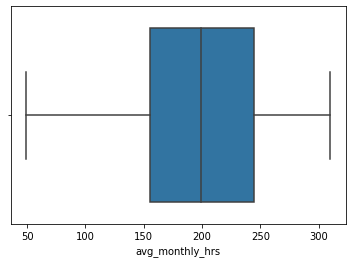

In [67]:
sns.boxplot(x='avg_monthly_hrs', data= df_merged_emp)

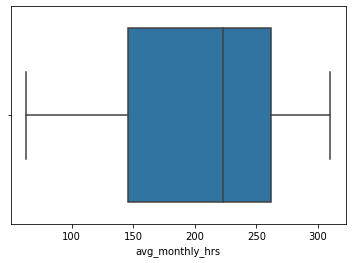

In [68]:
sns.boxplot(x='avg_monthly_hrs', data= df_left)

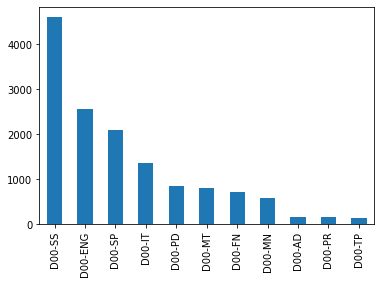

In [69]:
df_merged_emp.department.value_counts().plot(kind='bar')

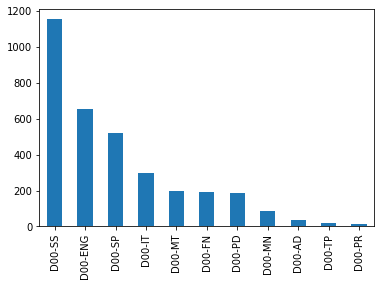

In [70]:
df_left.department.value_counts().plot(kind='bar')

In [71]:
left_dept = pd.DataFrame(columns=['dept_id', 'percentage_left'])

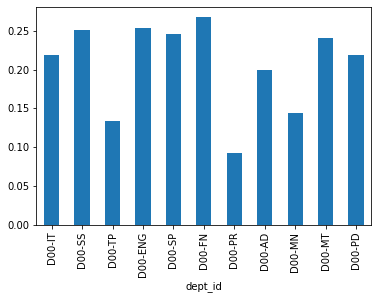

In [72]:
per_list = []
for dept in df_dept_data['dept_id']:
  val = len(df_left[df_left['department']== dept]) / len(df_merged_emp[df_merged_emp['department']== dept])
  per_list.append(val)

left_dept['dept_id'] = df_dept_data['dept_id']
left_dept['percentage_left'] = per_list
left_dept.set_index('dept_id', inplace=True)
left_dept.percentage_left.plot(kind='bar')

In [73]:
# Departments that lost 25% and above employees
left_dept[left_dept['percentage_left']>=0.25]

,percentage_left
dept_id,
D00-SS,0.250815
D00-ENG,0.254178
D00-FN,0.267313


In [74]:
df_merged_emp.filed_complaint.value_counts()

0       12075
1.00     2041
Name: filed_complaint, dtype: int64

In [75]:
df_left.filed_complaint.value_counts()

0       3203
1.00     152
Name: filed_complaint, dtype: int64

In [76]:
df_employed.filed_complaint.value_counts()

0       8872
1.00    1889
Name: filed_complaint, dtype: int64

In [77]:
print("Number of  employee left who filed complaint : ", len(df_left[df_left['filed_complaint']== 1 ]))
print("Total number of  emloyees filed_complaint : ", len(df_merged_emp[df_merged_emp['filed_complaint']==1 ]))
print("% of  employee left who filed complaints : ", len(df_left[df_left['filed_complaint']== 1]) / len(df_merged_emp[df_merged_emp['filed_complaint']== 1]))
print("Number of employee left without filing complaints : ", len(df_left[df_left['filed_complaint']== 0 ]))
print("Total number of  emloyees without filing complaints : ", len(df_merged_emp[df_merged_emp['filed_complaint']== 0]))
print("% of employee left without filing complaints : ", len(df_left[df_left['filed_complaint']== 0 ]) / len(df_merged_emp[df_merged_emp['filed_complaint']==0 ]))

Number of  employee left who filed complaint :  152
Total number of  emloyees filed_complaint :  2041
% of  employee left who filed complaints :  0.0744732974032337
Number of employee left without filing complaints :  3203
Total number of  emloyees without filing complaints :  12075
% of employee left without filing complaints :  0.26525879917184264


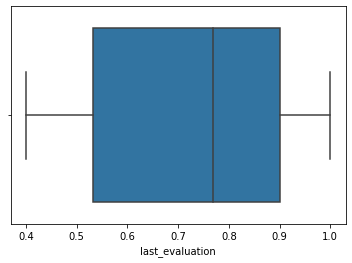

In [78]:
sns.boxplot(x='last_evaluation', data = df_left)

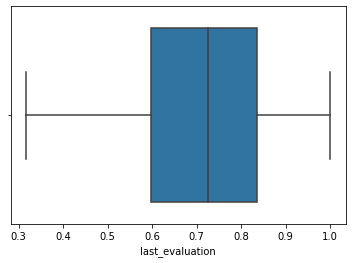

In [79]:
sns.boxplot(x='last_evaluation', data = df_employed)

In [80]:
df_merged_emp.n_projects.value_counts()

4    4044
3    3788
5    2566
2    2322
6    1093
7     242
1      61
Name: n_projects, dtype: int64

In [81]:
df_left.n_projects.value_counts()

2    1484
6     614
5     560
4     377
7     242
3      71
1       7
Name: n_projects, dtype: int64

In [82]:
left_n_projects= pd.DataFrame(columns=['n_projects', 'percentage_left'])
left_n_projects['n_projects']= [1,2,3,4,5,6,7]

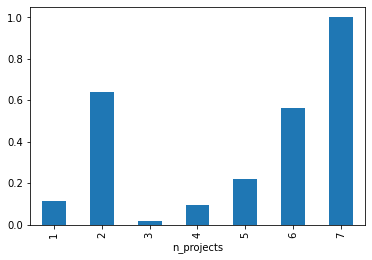

In [83]:
# To know the percentage of employees left based on number of projects worked
per_list = []
for n in left_n_projects['n_projects']:
  val = len(df_left[df_left['n_projects']== n]) / len(df_merged_emp[df_merged_emp['n_projects']== n ])
  per_list.append(val)

left_n_projects['percentage_left'] = per_list
left_n_projects.set_index('n_projects', inplace=True)
left_n_projects.percentage_left.plot(kind='bar')

In [84]:
# All employees who worked for 7 projects left, 60% of employees who worked either 2 or 6 projects also left.

In [85]:
df_merged_emp['recently_promoted'].value_counts()

0.0    13819
1.0      297
Name: recently_promoted, dtype: int64

In [86]:
df_left['recently_promoted'].value_counts()

0.0    3337
1.0      18
Name: recently_promoted, dtype: int64

In [87]:
#Assuming that 0 is for not recently promoted, 99.995% employees that left  are not recently promoted

In [88]:
df_merged_emp.salary.value_counts()

low       6889
medium    6086
high      1141
Name: salary, dtype: int64

In [89]:
df_left.salary.value_counts()

low       2038
medium    1240
high        77
Name: salary, dtype: int64

In [90]:
print("% of low salaried employee left is ", len(df_left[df_left['salary']=='low']) / len(df_merged_emp[df_merged_emp['salary']=='low']))
print("% of medium salaried employee left is ", len(df_left[df_left['salary']=='medium']) / len(df_merged_emp[df_merged_emp['salary']=='medium']))
print("% of high salaried employee left is ", len(df_left[df_left['salary']=='high']) / len(df_merged_emp[df_merged_emp['salary']=='high']))

% of low salaried employee left is  0.2958339381622877
% of medium salaried employee left is  0.20374630299046992
% of high salaried employee left is  0.06748466257668712


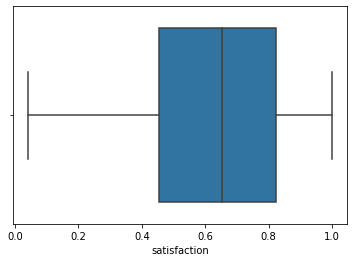

In [91]:
sns.boxplot(x='satisfaction', data=df_merged_emp)

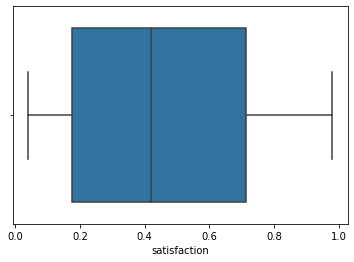

In [92]:
sns.boxplot(x='satisfaction', data=df_left)

In [93]:
# Median score of the satifaction is 0.41 for the employees that are left.

In [94]:
df_merged_emp.tenure.value_counts()

3.00     6156
2.00     3019
4.00     2386
5.00     1363
6.00      659
10.00     198
7.00      180
8.00      155
Name: tenure, dtype: int64

In [95]:
df_left.tenure.value_counts()

3.00    1512
4.00     834
5.00     771
6.00     190
2.00      48
Name: tenure, dtype: int64

In [96]:
left_tenure= pd.DataFrame(columns=['tenure', 'percentage_left'])
left_tenure['tenure']= [2,3,4,5,6,7,8]

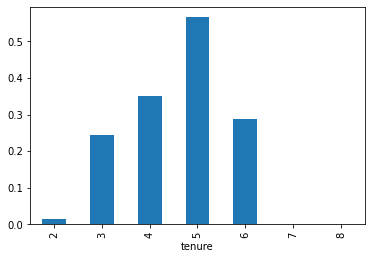

In [97]:
# To know the percentage of employees left based on number of projects worked
per_list = []
for n in left_tenure['tenure']:
  val = len(df_left[df_left['tenure']== n]) / len(df_merged_emp[df_merged_emp['tenure']== n ])
  per_list.append(val)

left_tenure['percentage_left'] = per_list
left_tenure.set_index('tenure', inplace=True)
left_tenure.percentage_left.plot(kind='bar')

In [98]:
# Attrition rate is increasing as the tenure is in range of 3 to 5

# Feature Engineering 

In [99]:
df_merged_emp.head(10)

,employee_id,age,gender,marital_status,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,113558,43,Male,Married,111.0,D00-PR,0,0.753977,5,1.0,medium,0.921208,Employed,4.00
1,112256,24,Female,Unmarried,201.0,D00-MN,0,0.964453,3,0.0,medium,0.568479,Employed,3.00
2,112586,22,Female,Unmarried,239.0,D00-SS,0,0.756458,3,0.0,low,0.144812,Employed,6.00
3,108071,36,Male,Married,151.0,D00-PR,0,0.608282,5,0.0,medium,0.210300,Employed,6.00
4,116915,38,Male,Married,259.0,D00-IT,0,0.749206,4,0.0,medium,0.888514,Employed,3.00
5,104555,22,Male,Unmarried,180.0,D00-SP,0,0.772377,3,0.0,low,0.356638,Employed,6.00
6,104706,51,Male,Married,194.0,D00-SS,0,0.534309,5,0.0,high,0.969191,Employed,2.00
7,118536,54,Male,Married,269.0,D00-IT,0,0.843665,6,0.0,low,0.084765,Left,4.00
8,111712,43,Male,Married,192.0,D00-SP,0,0.750987,4,0.0,low,0.617988,Employed,2.00
9,119150,49,Male,Married,205.0,D00-SS,1.00,0.534207,4,0.0,low,0.129333,Employed,5.00


In [100]:
df_merged_emp['filed_complaint'] = df_merged_emp['filed_complaint'].astype(int)

In [101]:
df_merged_emp['tenure'] = df_merged_emp['tenure'].astype(int)

In [102]:
# dropping employee_id column as its unique number
df_merged_emp.drop(labels=['employee_id'], axis=1, inplace=True)

In [103]:
cat_cols=df_merged_emp.select_dtypes(include='object').columns

In [105]:
label = df_merged_emp.pop('status')

In [106]:
label = label.map({'Employed': 0, 'Left': 1})

In [108]:
cat_cols=df_merged_emp.select_dtypes(include='object').columns

In [109]:
cat_cols

Index(['gender', 'marital_status', 'department', 'salary'], dtype='object')

In [110]:
df_merged_emp_dum = pd.get_dummies(df_merged_emp, columns=cat_cols) #drop_first=True

In [111]:
df_merged_emp_dum.head()

,age,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,gender_Female,gender_Male,marital_status_Married,marital_status_Unmarried,department_D00-AD,department_D00-ENG,department_D00-FN,department_D00-IT,department_D00-MN,department_D00-MT,department_D00-PD,department_D00-PR,department_D00-SP,department_D00-SS,department_D00-TP,salary_high,salary_low,salary_medium
0,43,111.0,0,0.753977,5,1.0,0.921208,4,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,24,201.0,0,0.964453,3,0.0,0.568479,3,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,22,239.0,0,0.756458,3,0.0,0.144812,6,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,36,151.0,0,0.608282,5,0.0,0.210300,6,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,38,259.0,0,0.749206,4,0.0,0.888514,3,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


# Build models

In [112]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(df_merged_emp_dum,label,test_size=0.20, random_state=42, stratify=label)

In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42, n_jobs=-1)
dclf=DecisionTreeClassifier(random_state=42)

# here we are using soft  voting
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('dtf',dclf)], voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                               

#### Trying with reduced set of features

In [122]:
df_merged_emp2 = df_merged_emp.drop(labels=['age','gender','marital_status'], axis=1)

In [123]:
df_merged_emp2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14116 entries, 0 to 14115
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14116 non-null  float64
 1   department         14116 non-null  object 
 2   filed_complaint    14116 non-null  int64  
 3   last_evaluation    14116 non-null  float64
 4   n_projects         14116 non-null  int64  
 5   recently_promoted  14116 non-null  float64
 6   salary             14116 non-null  object 
 7   satisfaction       14116 non-null  float64
 8   tenure             14116 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 1.1+ MB


In [146]:
cat_cols2=df_merged_emp2.select_dtypes(include='object').columns

In [147]:
df_merged_emp2_dum = pd.get_dummies(df_merged_emp2, columns=cat_cols2)

In [148]:
df_merged_emp2_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14116 entries, 0 to 14115
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   avg_monthly_hrs     14116 non-null  float64
 1   filed_complaint     14116 non-null  int64  
 2   last_evaluation     14116 non-null  float64
 3   n_projects          14116 non-null  int64  
 4   recently_promoted   14116 non-null  float64
 5   satisfaction        14116 non-null  float64
 6   tenure              14116 non-null  int64  
 7   department_D00-AD   14116 non-null  uint8  
 8   department_D00-ENG  14116 non-null  uint8  
 9   department_D00-FN   14116 non-null  uint8  
 10  department_D00-IT   14116 non-null  uint8  
 11  department_D00-MN   14116 non-null  uint8  
 12  department_D00-MT   14116 non-null  uint8  
 13  department_D00-PD   14116 non-null  uint8  
 14  department_D00-PR   14116 non-null  uint8  
 15  department_D00-SP   14116 non-null  uint8  
 16  depa

In [170]:
X_train2,X_test2,y_train2,y_test2=train_test_split(df_merged_emp2_dum,label,test_size=0.20, random_state=42, stratify=label)

In [171]:
log_clf2 = LogisticRegression(random_state=42)
rnd_clf2 = RandomForestClassifier(random_state=42, n_jobs=-1)
dclf2=DecisionTreeClassifier(random_state=42)

# here we are using soft  voting
voting_clf2 = VotingClassifier(
    estimators=[('lr', log_clf2), ('rf', rnd_clf2), ('dtf',dclf2)], voting='soft')
voting_clf2.fit(X_train2, y_train2)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                               

# Evaluating the Models

In [114]:
from sklearn.metrics import accuracy_score
print('Accuracy scores are : ')
for clf in (log_clf, rnd_clf, dclf, voting_clf):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

from sklearn.metrics import roc_auc_score
print(' roc_auc_scores are : ')
for clf in (log_clf, rnd_clf, dclf, voting_clf):
  clf.fit(X_train, y_train)
  print(clf.__class__.__name__, roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])) 

Accuracy scores are : 
LogisticRegression 0.8080736543909348
RandomForestClassifier 0.9801699716713881
DecisionTreeClassifier 0.9642351274787535
VotingClassifier 0.9734419263456091
 roc_auc_scores are : 
LogisticRegression 0.8224111782471067
RandomForestClassifier 0.9921216920485955
DecisionTreeClassifier 0.9555145386848005
VotingClassifier 0.9887281670534928


In [115]:
from sklearn.metrics import f1_score

print('F1  scores are : ')
for clf in (log_clf, rnd_clf, dclf, voting_clf):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, f1_score(y_test, y_pred))

F1  scores are : 
LogisticRegression 0.5009208103130756
RandomForestClassifier 0.9572519083969465
DecisionTreeClassifier 0.925789860396767
VotingClassifier 0.9433962264150944


In [172]:
print(' roc_auc_scores are : ')
for clf in (log_clf2, rnd_clf2, dclf2, voting_clf2):
  clf.fit(X_train2, y_train2)
  print(clf.__class__.__name__, roc_auc_score(y_test2, clf.predict_proba(X_test2)[:, 1])) 

 roc_auc_scores are : 
LogisticRegression 0.8133010951342978
RandomForestClassifier 0.9925550110994745
DecisionTreeClassifier 0.9634689889614394
VotingClassifier 0.9881266426841416


In [173]:
print('F1  scores are : ')
for clf in (log_clf2, rnd_clf2, dclf2, voting_clf2):
  clf.fit(X_train2, y_train2)
  y_pred2 = clf.predict(X_test2)
  print(clf.__class__.__name__, f1_score(y_test2, y_pred2))

F1  scores are : 
LogisticRegression 0.4427767354596623
RandomForestClassifier 0.9564553093964858
DecisionTreeClassifier 0.9408284023668638
VotingClassifier 0.9525959367945824


### Taking the RandomForestClassifier 0.95645 [rnd_clf2] as final model to test the unseen data.

### Unseen Data 

In [118]:
from google.colab import files
uploaded = files.upload()

Saving GCD_Capstone_Project_unseen_data - GCD_Capstone_Project_unseen_data.csv to GCD_Capstone_Project_unseen_data - GCD_Capstone_Project_unseen_data.csv


In [155]:
import io
usd_df = pd.read_csv(io.BytesIO(uploaded['GCD_Capstone_Project_unseen_data - GCD_Capstone_Project_unseen_data.csv']))
usd_df.head(5)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,employee_id
0,134,D00-IT,NaN,0.528841,2,NaN,low,0.400464,3.0,119045
1,221,D00-PD,NaN,0.784561,2,NaN,low,0.759513,3.0,112223
2,156,D00-SS,NaN,0.545183,2,NaN,medium,0.336457,3.0,103924
3,133,D00-PR,NaN,NaN,4,NaN,medium,0.832039,2.0,105922
4,135,D00-SS,NaN,0.454637,2,NaN,low,0.320723,5.0,103297


In [156]:
usd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    100 non-null    int64  
 1   department         98 non-null     object 
 2   filed_complaint    15 non-null     float64
 3   last_evaluation    83 non-null     float64
 4   n_projects         100 non-null    int64  
 5   recently_promoted  3 non-null      float64
 6   salary             100 non-null    object 
 7   satisfaction       97 non-null     float64
 8   tenure             97 non-null     float64
 9   employee_id        100 non-null    int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 7.9+ KB


In [157]:
# Changing avg_monthly_hours data type to float
usd_df['avg_monthly_hrs'] = usd_df.avg_monthly_hrs.astype(float)

In [158]:
usd_df['department'].fillna('D00-SS', inplace=True)

In [159]:
usd_df['department'].replace({'-IT' : 'D00-IT'}, inplace=True)

In [160]:
usd_df.drop(labels=['employee_id'], axis=1, inplace=True)

In [161]:
usd_df['filed_complaint'].fillna(0, inplace=True)
usd_df['filed_complaint'] = usd_df.filed_complaint.astype(int)

In [162]:
usd_df['last_evaluation'].fillna(usd_df['last_evaluation'].median(),inplace=True)

In [163]:
usd_df['recently_promoted'].fillna(0, inplace=True)

In [164]:
usd_df['satisfaction'].fillna(usd_df['satisfaction'].median(), inplace=True)

In [165]:
usd_df['tenure'].fillna(3, inplace=True)   # 3 is mode of 'tenure' feature

In [166]:
cat_cols_usd = usd_df.select_dtypes(include='object').columns

In [167]:
cat_cols_usd

Index(['department', 'salary'], dtype='object')

In [168]:
usd_df_dum = pd.get_dummies(usd_df, cat_cols_usd)

In [169]:
usd_df_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   avg_monthly_hrs     100 non-null    float64
 1   filed_complaint     100 non-null    int64  
 2   last_evaluation     100 non-null    float64
 3   n_projects          100 non-null    int64  
 4   recently_promoted   100 non-null    float64
 5   satisfaction        100 non-null    float64
 6   tenure              100 non-null    float64
 7   department_D00-AD   100 non-null    uint8  
 8   department_D00-ENG  100 non-null    uint8  
 9   department_D00-FN   100 non-null    uint8  
 10  department_D00-IT   100 non-null    uint8  
 11  department_D00-MN   100 non-null    uint8  
 12  department_D00-MT   100 non-null    uint8  
 13  department_D00-PD   100 non-null    uint8  
 14  department_D00-PR   100 non-null    uint8  
 15  department_D00-SP   100 non-null    uint8  
 16  departmen

In [176]:
final_pred_rf = rnd_clf2.predict_proba(usd_df_dum)

In [178]:
final_pred_rf[:,1]

array([1.  , 0.05, 1.  , 0.01, 0.64, 0.  , 0.09, 0.01, 0.  , 0.  , 0.03,
       1.  , 0.86, 0.  , 0.03, 0.  , 1.  , 0.01, 0.01, 0.01, 0.97, 1.  ,
       0.  , 0.05, 0.57, 0.01, 0.01, 0.02, 0.98, 0.02, 0.01, 0.  , 0.  ,
       0.02, 0.  , 0.43, 0.07, 1.  , 0.  , 0.05, 1.  , 0.55, 0.02, 0.03,
       0.  , 0.05, 1.  , 0.01, 0.01, 0.04, 0.03, 0.01, 0.03, 0.03, 0.13,
       0.  , 0.01, 0.  , 0.  , 0.84, 0.01, 0.94, 0.58, 0.05, 1.  , 0.69,
       0.  , 1.  , 0.  , 0.98, 0.12, 0.01, 0.  , 0.15, 0.73, 0.65, 0.08,
       0.  , 0.21, 0.01, 0.65, 0.44, 0.13, 0.8 , 0.01, 0.  , 0.  , 0.09,
       0.13, 0.03, 0.94, 0.86, 0.18, 0.97, 0.71, 0.  , 0.  , 0.  , 0.  ,
       0.08])

In [179]:
from google.colab import files
pd.DataFrame(final_pred_rf[:,]).to_csv('final_pred_rf.csv') 
files.download('final_pred_rf.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>